In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [73]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
df_list = pd.read_html(
            url, # Specify the page 
            match='Country or area', # Write a pattern that is unique to the table we are interested in
            header=0 # which line of the table to use as a header
        )

len(df_list) # check how many tables match

1

In [74]:
df_population = df_list[0]
df_population

,Rank,Country or area,UN continentalregion[2],UN statisticalregion[2],Population(1 July 2016)[3],Population(1 July 2017)[3],Change
0,—,World,—,—,7466964280,7550262101,+1.1%
1,1,China[a],Asia,Eastern Asia,1403500365,1409517397,+0.4%
2,2,India,Asia,Southern Asia,1324171354,1339180127,+1.1%
3,3,United States,Americas,Northern America,322179605,324459463,+0.7%
4,4,Indonesia,Asia,South-eastern Asia,261115456,263991379,+1.1%
5,5,Brazil,Americas,South America,207652865,209288278,+0.8%
6,6,Pakistan,Asia,Southern Asia,193203476,197015955,+2.0%
7,7,Nigeria,Africa,Western Africa,185989640,190886311,+2.6%
8,8,Bangladesh,Asia,Southern Asia,162951560,164669751,+1.1%
9,9,Russia,Europe,Eastern Europe,146864513,146989754,+0.1%


In [75]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
df_list = pd.read_html(
            url, # Specify the page 
            match='Country and regions', # Write a pattern that is unique to the table we are interested in
            header=0 # which line of the table to use as a header
        )

len(df_list)

1

In [76]:
df_who=df_list[0]
df_who

,Country and regions,Both sexesrank,Both sexes lifeexpectancy,Female rank,Female life expectancy,Male rank,Male life expectancy,Both sexesrank (HALE),Both sexes lifeexpectancy (HALE)
0,Japan,1,83.7,1,86.8,6,80.5,1,74.9
1,Switzerland,2,83.4,6,85.3,1,81.3,4,73.1
2,Singapore,3,83.1,2,86.1,10,80.0,2,73.9
3,Australia,4,82.8,7,84.8,3,80.9,15,71.9
4,Spain,4,82.8,3,85.5,9,80.1,9,72.4
5,Iceland,6,82.7,10,84.1,2,81.2,7,72.7
6,Italy,6,82.7,7,84.8,6,80.5,5,72.8
7,Israel,8,82.5,9,84.3,5,80.6,5,72.8
8,Sweden,9,82.4,12,84.0,4,80.7,12,72.0
9,France,9,82.4,5,85.4,16,79.4,8,72.6


In [77]:
join = pd.merge(df_population, df_who, how = 'outer', left_on= 'Country or area', right_on = 'Country and regions' )

In [78]:
join['PopulationRank'] = pd.to_numeric(join.Rank, errors='coerce')

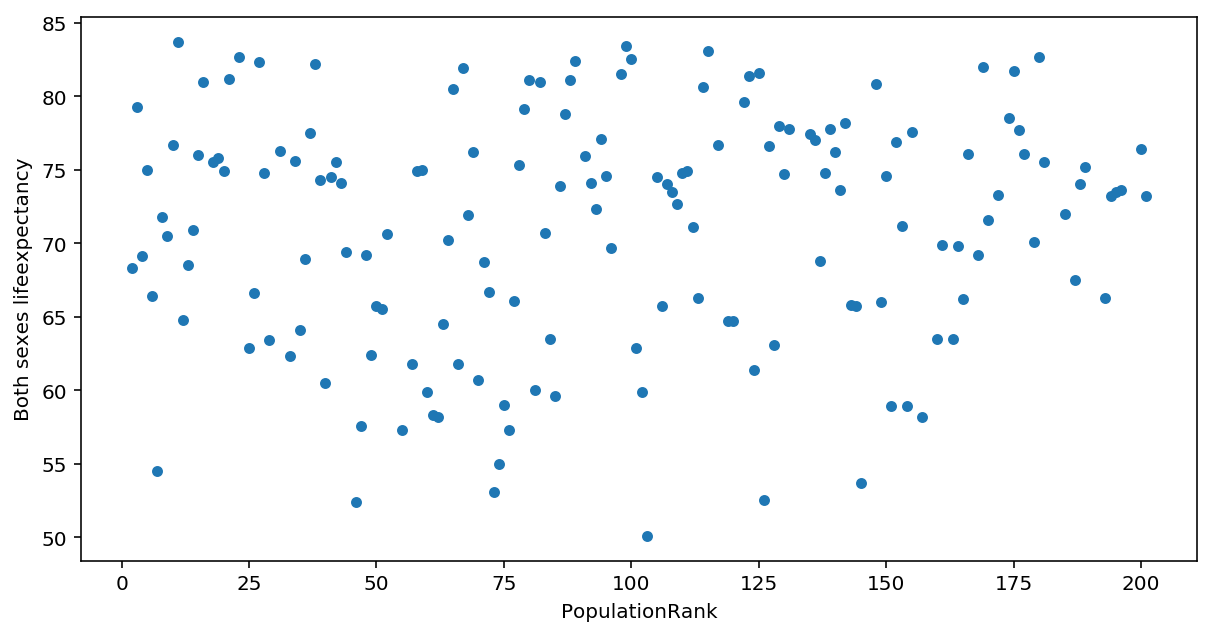

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

join.plot.scatter(x='PopulationRank', y = 'Both sexes lifeexpectancy', ax=ax)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


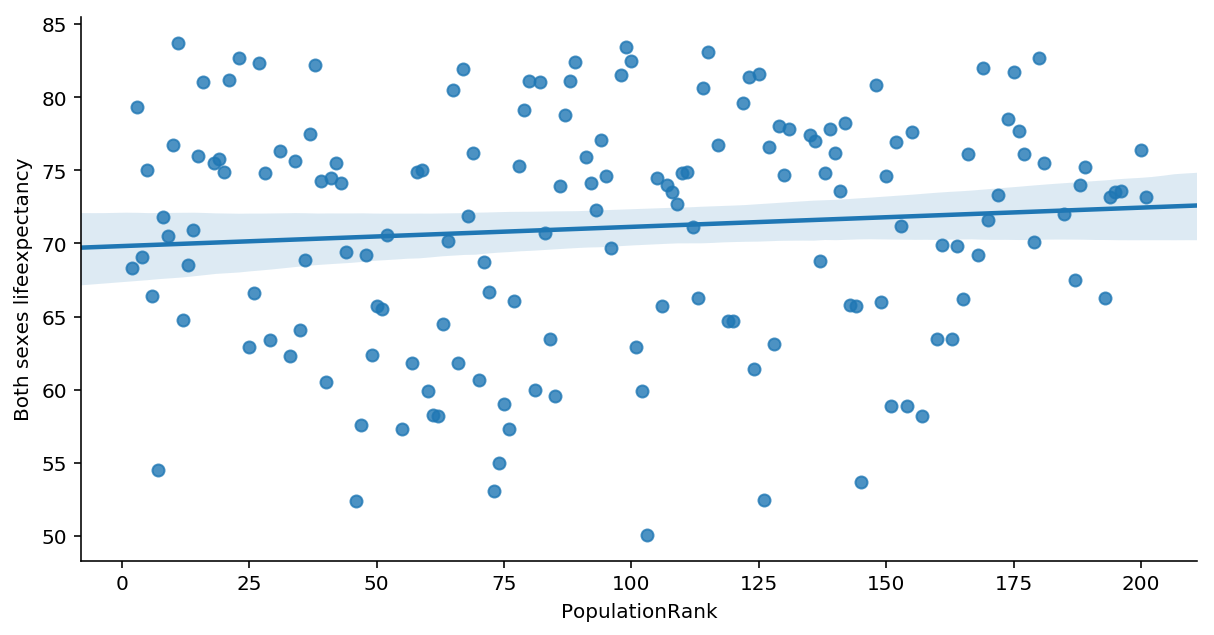

In [93]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

# https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(x='PopulationRank', y='Both sexes lifeexpectancy', data=join, ax=ax)
sns.despine()